# Bank Marketing Analysis

## Background

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Dataset can be founded in [here](https://archive.ics.uci.edu/dataset/222/bank+marketing).

## **Plan**

The main objective of the project is to predict customer subscriptions to time deposits based on a direct marketing campaign conducted by a Portuguese banking institution via telephone. This goal translates into optimizing marketing resources, enhancing customer engagement strategies, and ultimately increasing the effectiveness of these campaigns. By leveraging historical data for a binary classification challenge, the project aims to effectively identify potential subscribers, improving campaign ROI and customer experience through targeted and informed promotion.

## **Analyze**

### 2.1 Import, Load and Examine 

In [1]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Modeling

# Linear Models
from sklearn.linear_model import LogisticRegression # Logistic Reg
# Ensemble Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest
# Boosting Models
from sklearn.ensemble import GradientBoostingClassifier  # GBM
from xgboost import XGBClassifier  # XGBoost
from lightgbm import LGBMClassifier  # LightGBM
# Other Models
from sklearn.tree import DecisionTreeClassifier  # Decision Trees
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN)


# Data processing
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split

# Evaluate
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, \
precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

from scipy.stats import randint
# setting
import warnings
warnings.filterwarnings("ignore")

sns.set_style("dark")

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";")
df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df_small = pd.read_csv("bank.csv", delimiter=";")
df_small

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 2.2 Data Cleaning

#### 2.2.1 Missing Values

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_small.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing value for both dataset, so we don't need do any actions.

### 2.2.2 Outliers

We will check outliers by looking at categorical columns: any written or non-related value inside?

#### 2.2.2.1 Categorical Columns

In [8]:
# Check category of all columns are objects
columns_object = df.select_dtypes("object")

for columns in columns_object:
    print(f"Value counts for {columns}")
    print(df[columns].value_counts())
    print("\n")

Value counts for job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for education
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for default
default
no     44396
yes      815
Name: count, dtype: int64


Value counts for housing
housing
yes    25130
no     20081
Name: count, dtype: int64


Value counts for loan
loan
no     37967
yes     7244
Name: count, dtype: int64


Value counts for contact
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


Value counts for month
month
may    13766
jul     6895

No outliers in categorial columns were found. We will move on to numeric columns

#### 2.2.2.2 Numeric Columns

We will visualize the data distribution using histograms, which is a general way to start when looking for outliers.

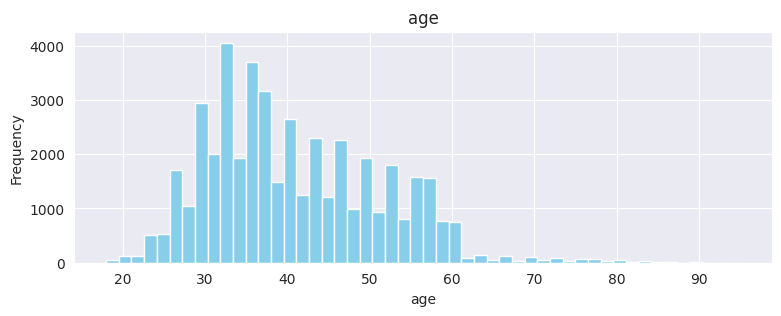

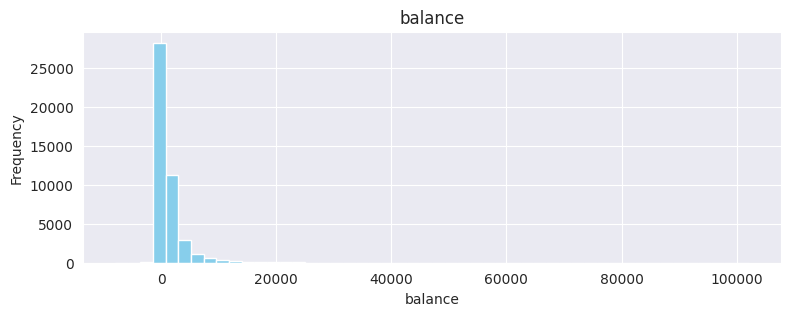

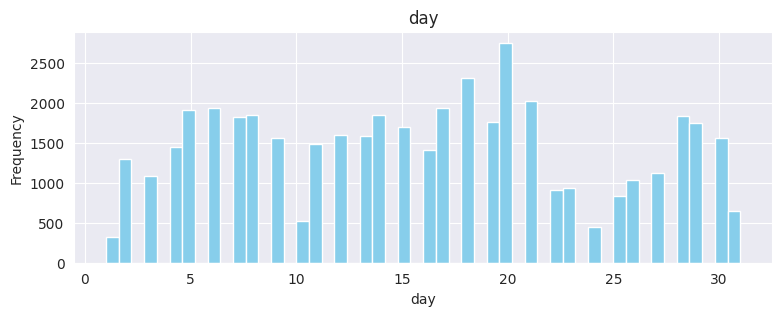

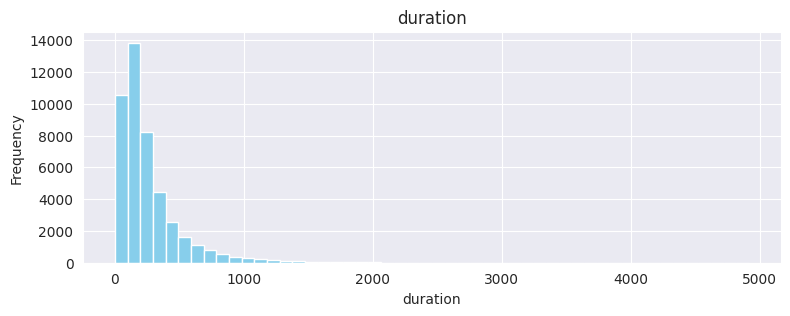

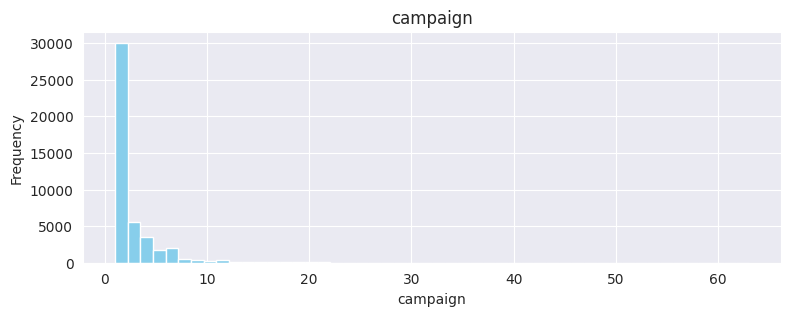

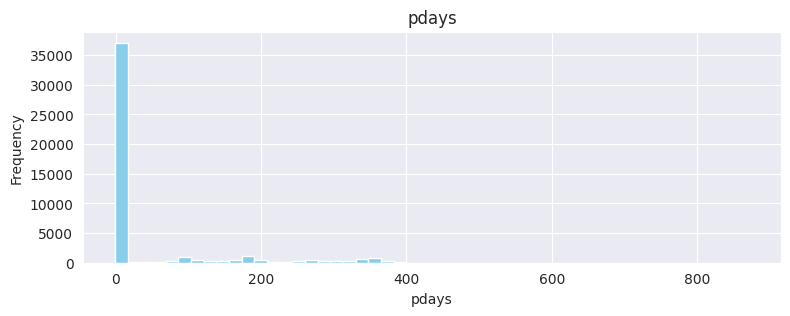

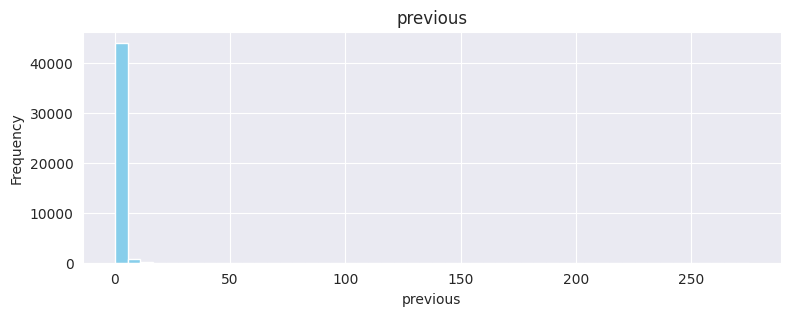

In [9]:
columns_numeric = df.select_dtypes("int")

for columns in columns_numeric:
    plt.figure(figsize=(9, 3))
    df[columns].hist(bins=50, color="skyblue")
    plt.title(columns)
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()


All the column's value seems normal, and no outliers were found in the graph ONLY.

Also, we can clearly know distrubution from each column, ex:
- `age` appears fairly normal but skewed to the right
- `balance` histogram shows a heavy concentration of values near zero
- All the graphs excrept `day` have strong Negative/left-skewed (a longer or fatter tail on the left side of the distribution)

But, we indeed find some potential outliers in the table. For example, the column `balance` is 75% only at 1428, but the max is 102127, which is not shown on the graph. And this may be considered an outlier because they are far from another number. On the other hand, the question is, in real life, a customer may be wealthy (rich people always have a small portion), which makes sense from this point. And banks can have VIPs. So, it's hard to say if we determine this is an outlier or not. We don't know how data was collected, so we might proceed without treating it as outliers.

### 2.3.3 Duplicates

In [10]:
df.duplicated().sum()

0

There are no duplicates.

### 2.3 Exploratory Data Analysis (EDA)

#### 2.3.1 Bank Client Data

This part of EDA will focus on bank client data.

##### 2.3.1.1 Age vs Balance with Term Deposit Subscription

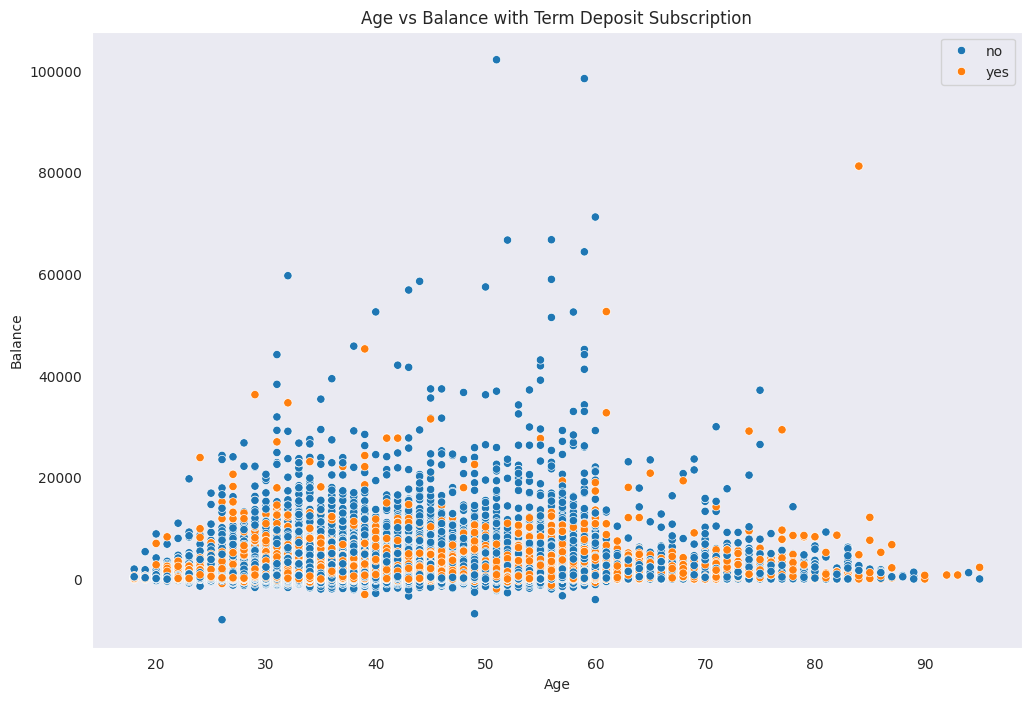

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="age", y="balance", hue="y", data=df)

plt.title("Age vs Balance with Term Deposit Subscription")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()
plt.show()

The scatter plot does not reveal an obvious trend between age and balance with regard to term deposit subscriptions. However, it suggests that individuals with a lower balance (less than 20,000 euros) across all age ranges might be inclined to subscribe to a term deposit.

#### 2.3.1.2 Job vs Balance with Respect to Term Deposit Subscription

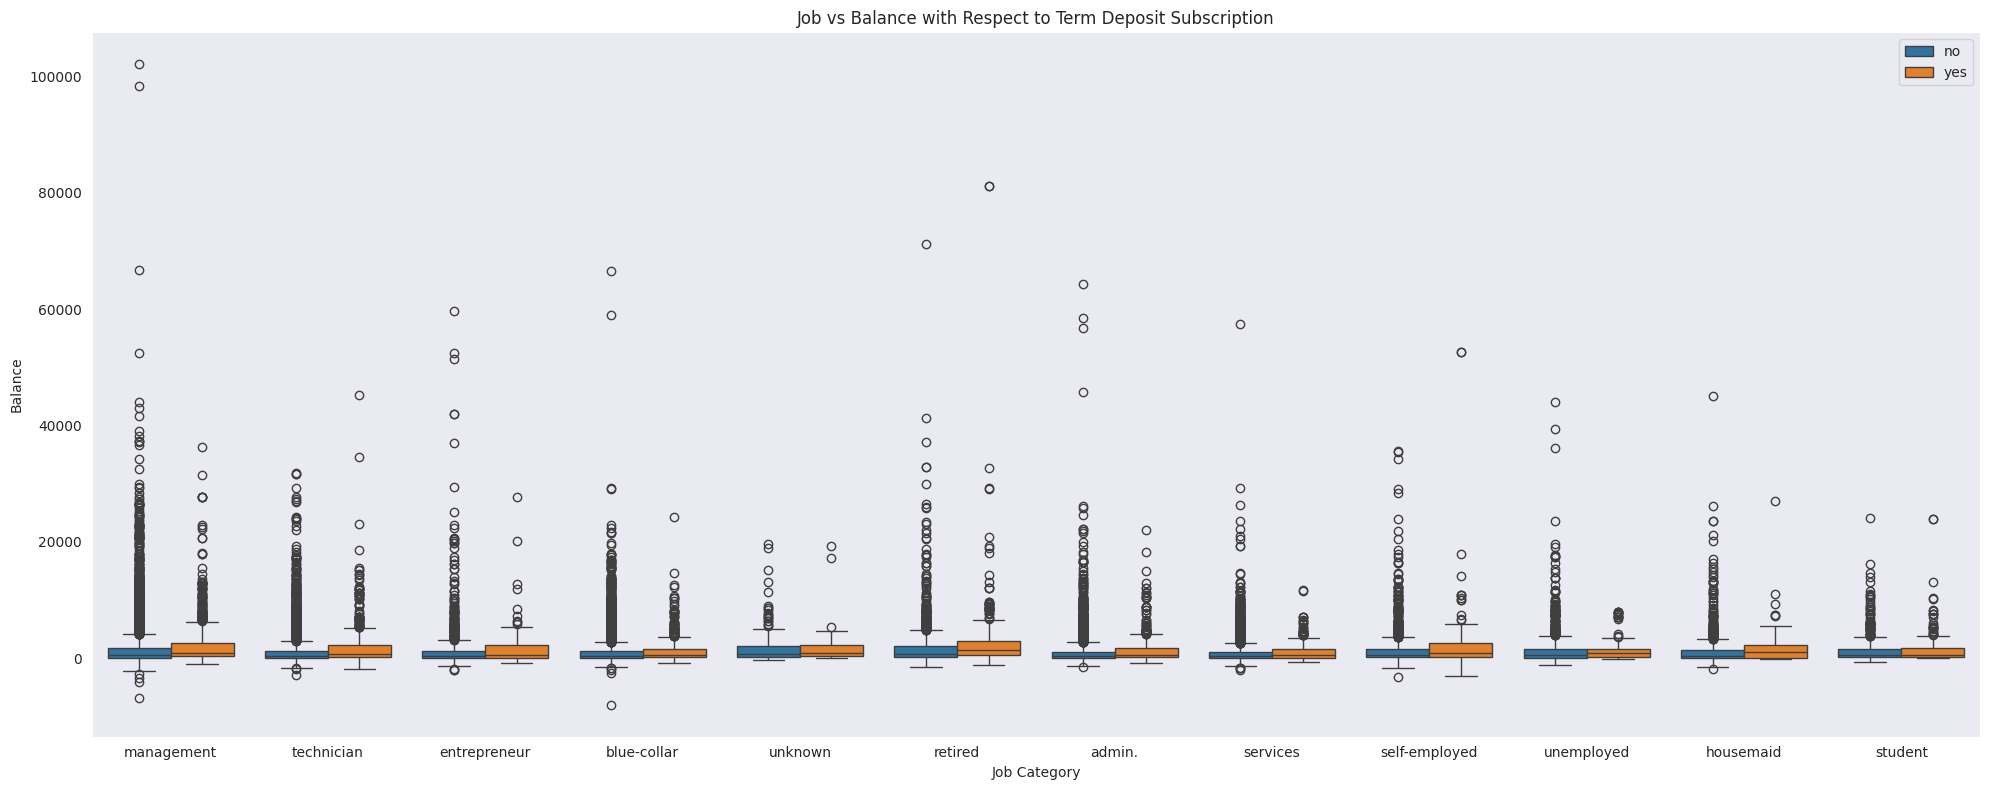

In [12]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="job", y="balance", hue="y", data=df)

plt.title("Job vs Balance with Respect to Term Deposit Subscription")
plt.xlabel("Job Category")
plt.ylabel("Balance")
plt.legend()
plt.tight_layout()
plt.show()

From this visual, it does seem that there are no stark differences between the median balances of individuals who subscribed to a term deposit and those who did not, across different job types, and also there is a wide range of balances within each job category.

#### 2.3.1.3 Education, Default, Housing, Loan

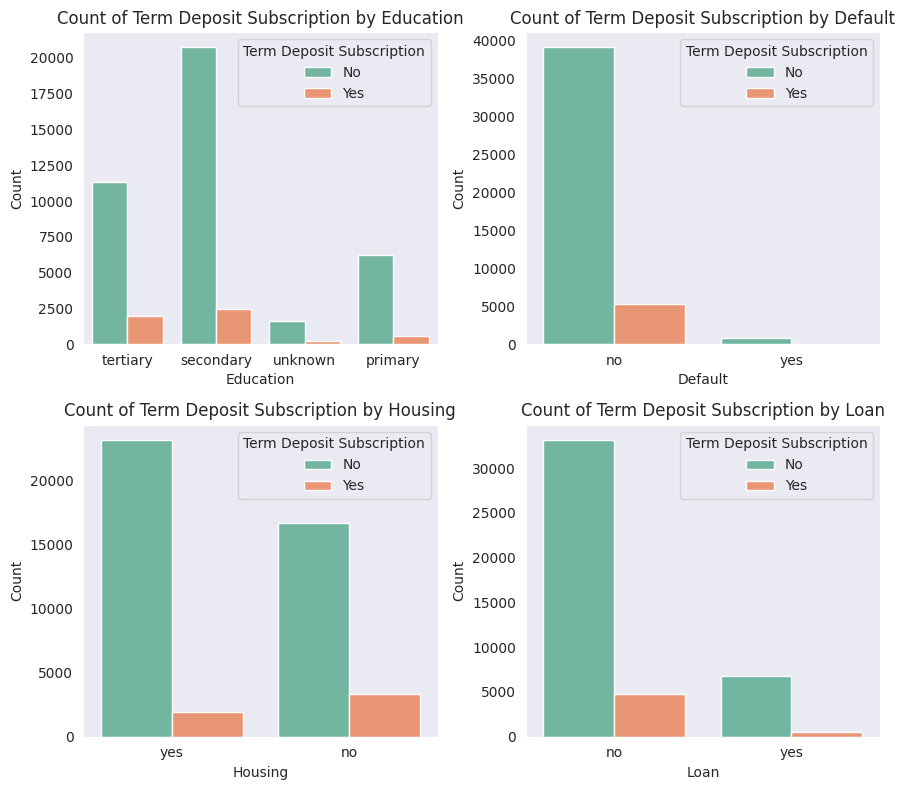

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
categories = ["education", "default", "housing", "loan"]

for ax, category in zip(axes.flatten(), categories):
    sns.countplot(x=category, hue="y", data=df, palette="Set2", ax=ax)
    ax.set_title(f"Count of Term Deposit Subscription by {category.title()}")
    ax.set_xlabel(category.title())
    ax.set_ylabel("Count")
    ax.legend(title="Term Deposit Subscription", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


The bar chart shows that while there are differences in subscription rates across education levels, credit default status, housing and loan status, the relationship between these and term deposit subscriptions is not very obvious.

#### 2.3.2 Last Contact of the Current Campaign

This part of EDA will focus on last contact of the current campaign.

##### 2.3.2.1 Last contact day of the month vs Duration

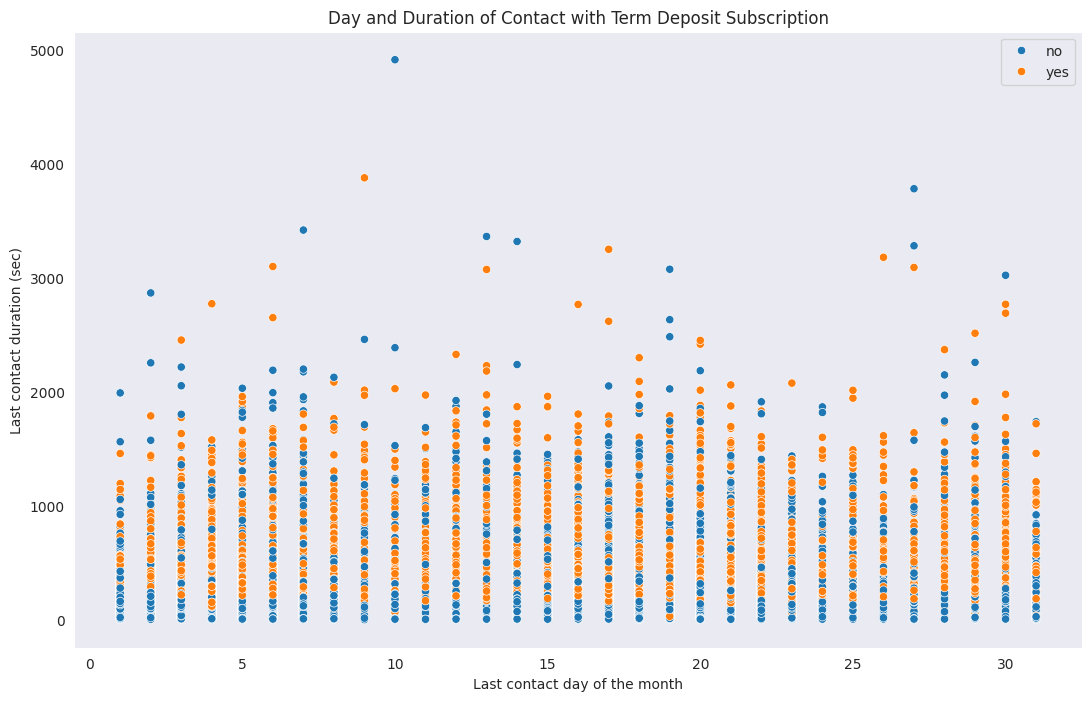

In [14]:
plt.figure(figsize=(13, 8))
sns.scatterplot(x="day", y="duration", hue="y", data=df)

plt.title("Day and Duration of Contact with Term Deposit Subscription")
plt.xlabel("Last contact day of the month")
plt.ylabel("Last contact duration (sec)")
plt.legend()
plt.show()

Subscription 'yes' and 'no' are interspersed throughout the month without a visible pattern indicating that contacts made on certain days are more likely to result in a subscription.

##### 2.3.2.2 Month Distribution

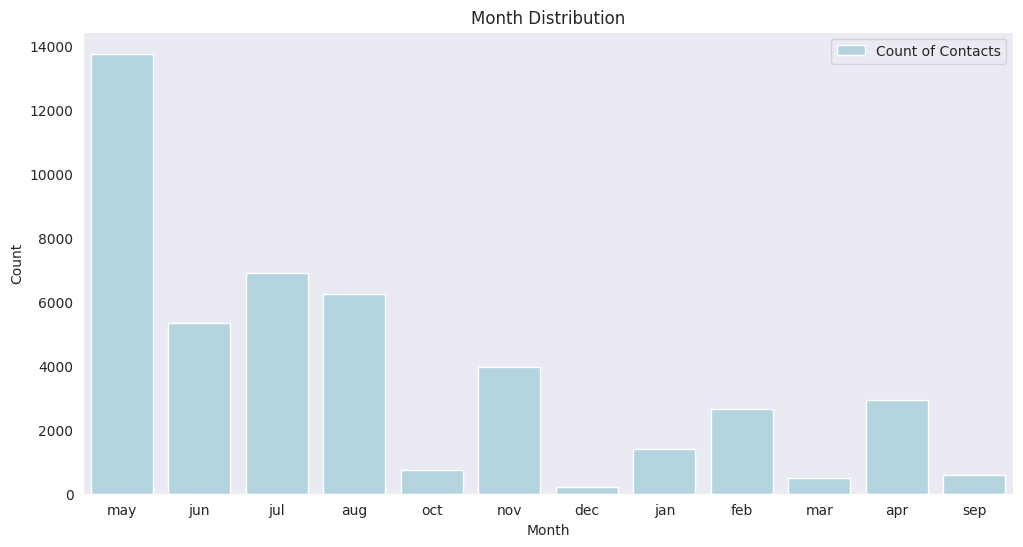

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, color="lightblue", label="Count of Contacts")

plt.title("Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

May stands out as the month with the highest number of contacts, approximately double the amount observed in the months with the next highest figures, which are July and August. This significant difference suggests that May was a particularly active period for contacting clients regarding term deposits.

#### 2.3.3 Other Attributes

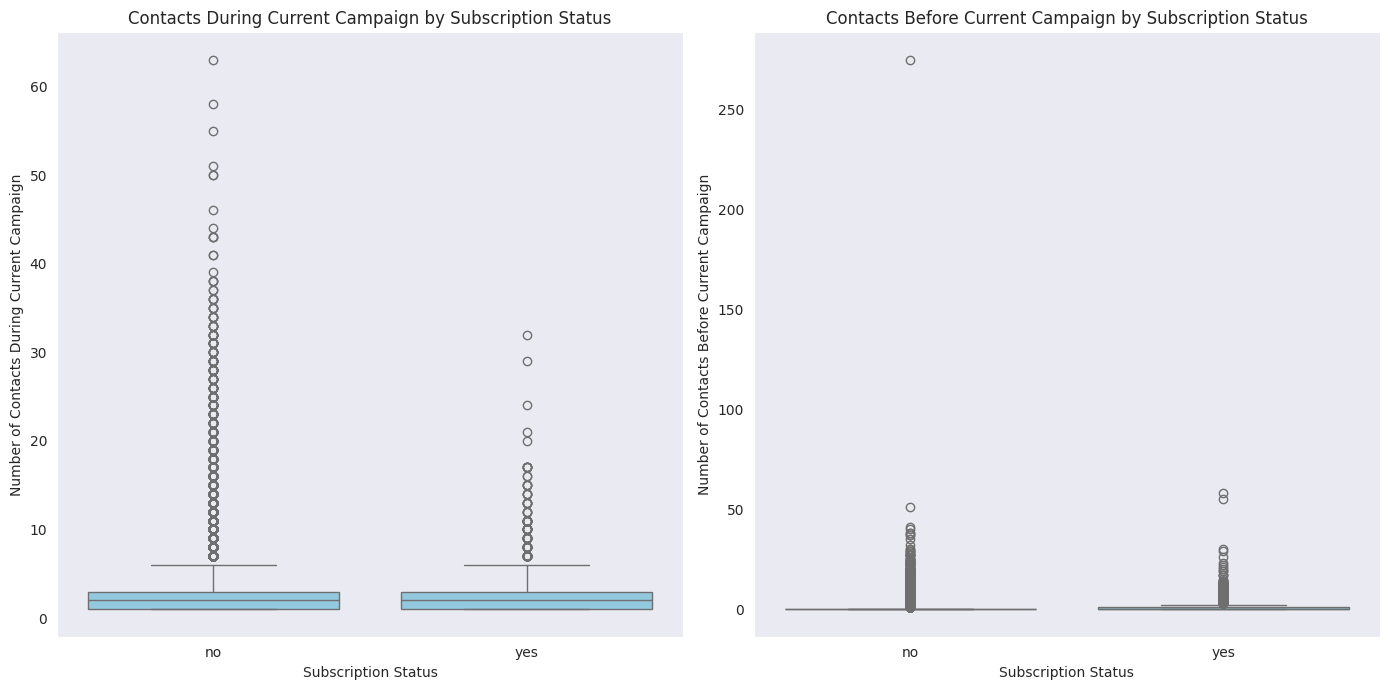

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Boxplot for "campaign"
sns.boxplot(ax=axes[0], x="y", y="campaign", data=df, color="skyblue")
axes[0].set_title("Contacts During Current Campaign by Subscription Status")
axes[0].set_xlabel("Subscription Status")
axes[0].set_ylabel("Number of Contacts During Current Campaign")

# Boxplot for "previous"
sns.boxplot(ax=axes[1], x="y", y="previous", data=df, color="skyblue")
axes[1].set_title("Contacts Before Current Campaign by Subscription Status")
axes[1].set_xlabel("Subscription Status")
axes[1].set_ylabel("Number of Contacts Before Current Campaign")

# Display the plot
plt.tight_layout()
plt.show()


The graph show that the campaign's approach was fairly consistent in terms of the number of contacts per client but also that making more contacts does not necessarily result in a higher subscription rate. 

#### 2.3.4 Overall Correlations

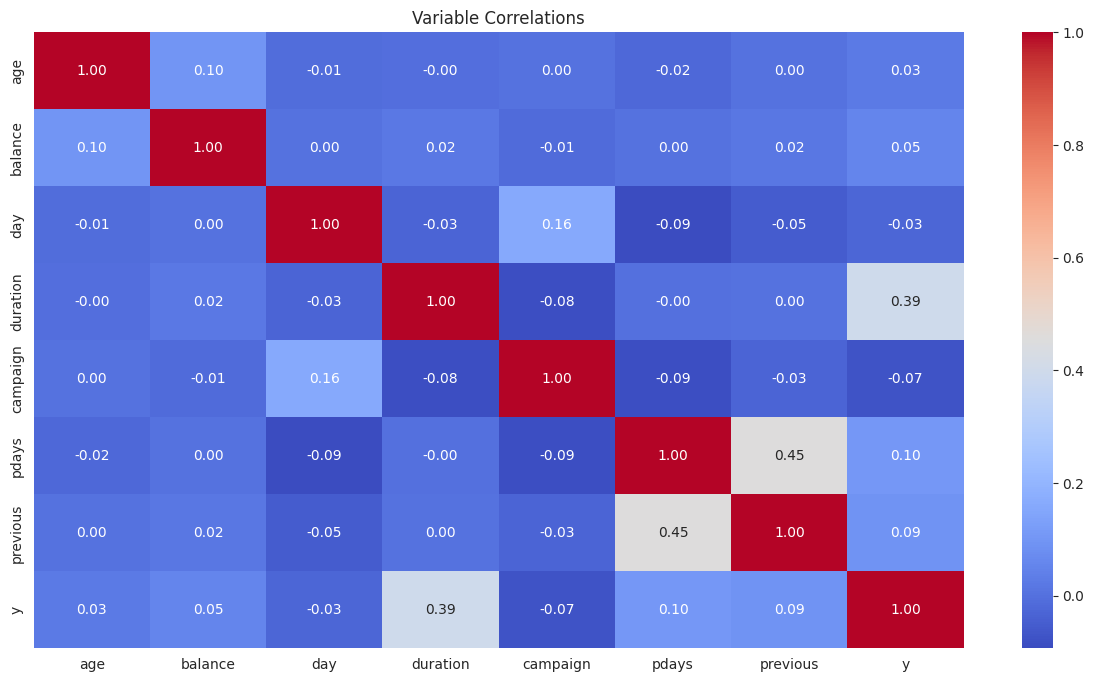

In [17]:
numeric_df = df.copy()
numeric_df["y"] = numeric_df["y"].map({"yes": 1, "no": 0})
numeric_df = numeric_df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Variable Correlations")
plt.show()

The heatmap shows that none of the two variables have a strong positive or negative relationship.

#### 2.3.5 Top Feature Affect Term Deposit Subscription

After modeling, we now know that duration, age, and balance are the top 3 features that affect results. We can try to plot it using a 3D scatterplot with respect to y and see what we can find.

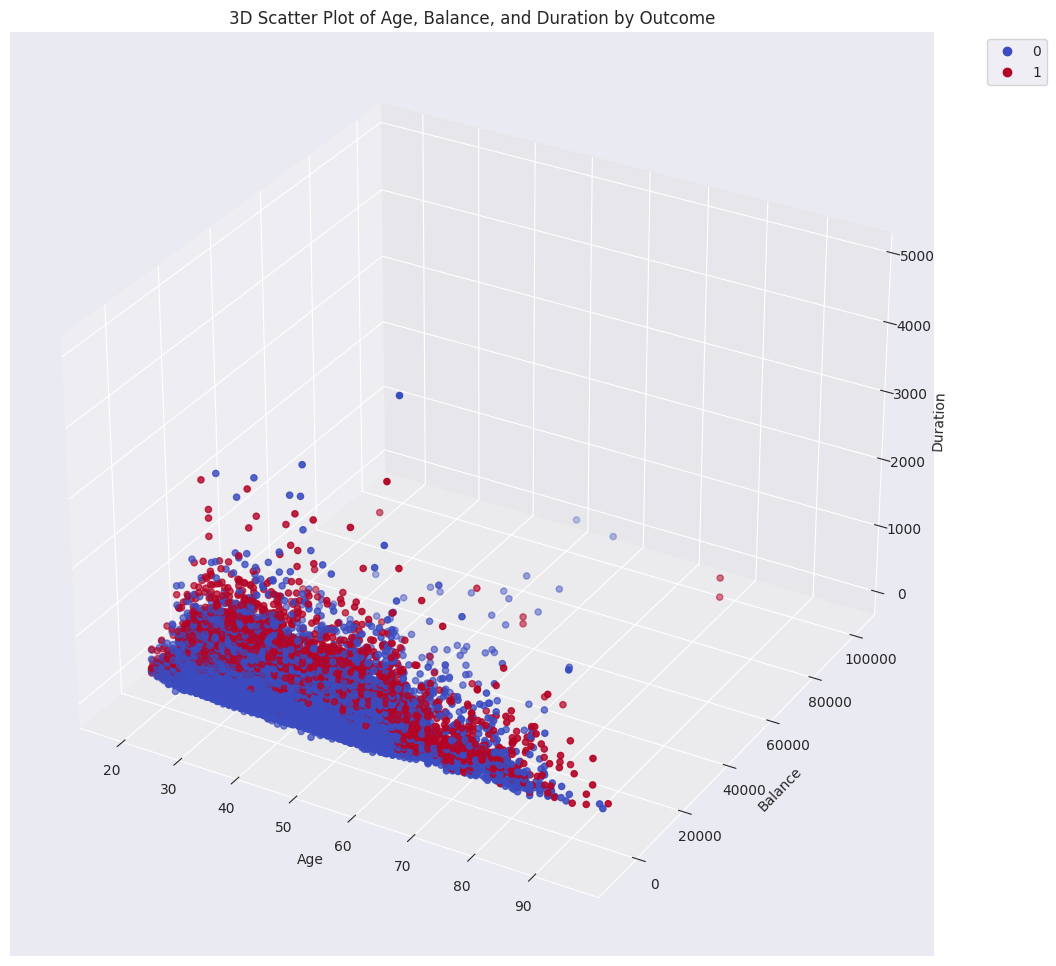

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(df["age"], df["balance"], df["duration"], c=numeric_df["y"], cmap="coolwarm")

ax.set_xlabel("Age")
ax.set_ylabel("Balance")
ax.set_zlabel("Duration")
plt.title("3D Scatter Plot of Age, Balance, and Duration by Outcome")

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In the 3D scatter plot:

- Most data points, especially those with lower balances and durations, are blue, indicating a high frequency of non-subscriptions within these ranges.
- Red dots are scattered throughout, but appear more frequently over longer periods of time, regardless of age or balance. This suggests that longer durations are associated with larger subscriptions.
- There is no clear distinction between the two categories, and while duration has the greatest impact, it is not the only determinant of subscription status.
- The distributions showed no clear pattern, suggesting that the relationship between these variables and the outcome is not simple or linear.

## **Construct**

### 3.1 Data Processing

We will start by replacing all non-numeric columns to numeric columns.

In [19]:
df["y"] = df["y"].map({"yes": 1, "no": 0})
df_small["y"] = df_small["y"].map({"yes": 1, "no": 0})

df = pd.get_dummies(df)
df_small = pd.get_dummies(df_small)

In [20]:
x = df.drop(columns=["y"])
y = df["y"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [21]:
# Normalization
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

> The following three parts will determine the best model overall.

### 3.2 Explore Distinct Model

We will employ 8 distinct machine learning models to determine the most effective approach.

In [22]:
# Initialize the models
models = {
    "log": LogisticRegression(random_state=1),
    "gbm": GradientBoostingClassifier(random_state=1),
    "rf": RandomForestClassifier(random_state=1),
    "dc": DecisionTreeClassifier(random_state=1),
    "svm": SVC(random_state=1),
    "knn": KNeighborsClassifier(),
    "xgb": XGBClassifier(random_state=1),
    "lgbm": LGBMClassifier(verbose=-1, random_state=1)
}

# Loop through the models dictionary
for name, model in models.items():
    model.fit(x_train_scaled, y_train)

# Start predict
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Print accuracy scores
for name, score in accuracy_scores.items():
    print(f"The accuracy score for {name} is: {score}")

The accuracy score for log is: 0.8992590954329316
The accuracy score for gbm is: 0.9047882339931439
The accuracy score for rf is: 0.9060046444763906
The accuracy score for dc is: 0.8825610969810903
The accuracy score for svm is: 0.9036824062811014
The accuracy score for knn is: 0.8926241291606768
The accuracy score for xgb is: 0.9081057171292712
The accuracy score for lgbm is: 0.9098750414685391


#### 3.3 Model Evaluation

In [23]:
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test_scaled)[:, 1]
        auc_roc = roc_auc_score(y_test, y_proba)
    else:
        auc_roc = None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if auc_roc is not None:
        print(f"AUC-ROC: {auc_roc:.4f}")
    print("\n")


Model: log
Accuracy: 0.8993
Precision: 0.6257
Recall: 0.3295
F1 Score: 0.4317
AUC-ROC: 0.9081


Model: gbm
Accuracy: 0.9048
Precision: 0.6417
Recall: 0.4076
F1 Score: 0.4985
AUC-ROC: 0.9260


Model: rf
Accuracy: 0.9060
Precision: 0.6520
Recall: 0.4086
F1 Score: 0.5023
AUC-ROC: 0.9274


Model: dc
Accuracy: 0.8826
Precision: 0.4947
Recall: 0.5343
F1 Score: 0.5137
AUC-ROC: 0.7313




Model: svm
Accuracy: 0.9037
Precision: 0.6630
Recall: 0.3467
F1 Score: 0.4553


Model: knn
Accuracy: 0.8926
Precision: 0.5678
Recall: 0.3152
F1 Score: 0.4054
AUC-ROC: 0.8028


Model: xgb
Accuracy: 0.9081
Precision: 0.6287
Recall: 0.5095
F1 Score: 0.5629
AUC-ROC: 0.9329


Model: lgbm
Accuracy: 0.9099
Precision: 0.6449
Recall: 0.4981
F1 Score: 0.5621
AUC-ROC: 0.9361




### 3.4 Predict on Samll Dataset

In [24]:
x_small = df_small.drop("y", axis=1)  
y_small = df_small["y"]  

x_small_scaled = scaler.transform(x_small)

accuracy_scores_small = {}

for name, model in models.items():
    y_pred_small = model.predict(x_small_scaled)
    accuracy_scores_small[name] = accuracy_score(y_small, y_pred_small)

for name, score in accuracy_scores_small.items():
    print(f"Model: {name}, Accuracy on small dataset: {score:.4f}")


Model: log, Accuracy on small dataset: 0.9025
Model: gbm, Accuracy on small dataset: 0.9067
Model: rf, Accuracy on small dataset: 0.9816
Model: dc, Accuracy on small dataset: 0.9774
Model: svm, Accuracy on small dataset: 0.9184
Model: knn, Accuracy on small dataset: 0.9098
Model: xgb, Accuracy on small dataset: 0.9447
Model: lgbm, Accuracy on small dataset: 0.9270


**Model Comparison**

By now, we had examined all 8 models, including their score and accuracy on a small dataset. Based on that, we can say:

Full data set:
- Random Forest and LightGBM show solid performance on all metrics, including the highest F1 score and AUC-ROC, and XGBoost also performs well.

Small data set:
- Random Forest showed significantly higher accuracy on small datasets. Decision Trees also showed higher accuracy on small datasets but lower AUC-ROC on complete datasets, indicating lower reliability.
- XGBoost and LightGBM follow closely behind, achieving good accuracy scores on small datasets.

Conclusion
- Random Forest is the best overall, followed by LightGBM and XGBoost.


Since Random Forest is the best model overall, we will proceed with Random Forest for the rest of the work.

### 3.5 Hyperparameter Turning

In [25]:
# Find best parameter
param_dist_rf = {"n_estimators": randint(100, 200),
                 "max_depth": randint(10,30)}

rf_for_tuning = RandomForestClassifier(random_state=42) # we change random state for Validation Phase

rand_search_rf = RandomizedSearchCV(rf_for_tuning, param_distributions=param_dist_rf, 
                                    n_iter=10, cv=5, random_state=42)

rand_search_rf.fit(x_train_scaled, y_train)

best_rf = rand_search_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=21, n_estimators=129, random_state=42)

In [26]:
# Train model using best para
best_rf_model = RandomForestClassifier(max_depth=21, n_estimators=129, random_state=1)
best_rf_model.fit(x_train_scaled, y_train)
x_test_scaled = scaler.transform(x_test)
y_pred_best_rf = best_rf_model.predict(x_test_scaled)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
accuracy_best_rf

0.9069998894172288

We only get a slight improvement in accuracy from 0.9060 to 0.9069 with the hyperparameter-tuned model. Due to the limited CPU resources, I stop here. 

This indicates that the model is already robust enough and archive Performance Ceiling. We will proceed with model evaluation again with the confusion matrix.

### 3.6 More Model Evaluation

#### 3.6.1 Confusion Matrix

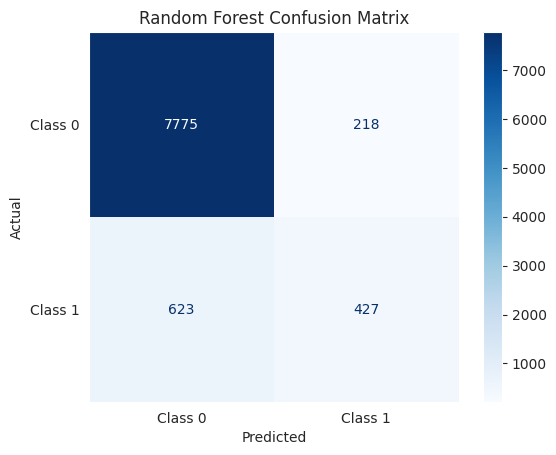

In [27]:
# Generate confusion matrix
y_pred_rf_cm = best_rf_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf_cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])

cmd.plot(cmap="Blues")
cmd.ax_.set(title="Random Forest Confusion Matrix", xlabel="Predicted", ylabel="Actual")
plt.show()

Based on the confusion matrix:

- **True Positives (TP)**: 427 cases were correctly predicted as Class 1.
- **True Negatives (TN)**: 7775 cases were correctly predicted as Class 0.
- **False Positives (FP)**: 218 cases were incorrectly predicted as Class 1.
- **False Negatives (FN)**: 623 cases were incorrectly predicted as Class 0.

As can be seen from the high number of TNs, the model is very good at predicting the negative class (class 0).
However, it seems to have some difficulties in dealing with the positive class (class 1) with a relatively large number of FNs, and it cannot identify the positive examples.

#### 3.6.2 Scores

In [28]:
y_pred_proba_rf = best_rf_model.predict_proba(x_test_scaled)
y_pred_rf = best_rf_model.predict(x_test_scaled)

# Define a function to get all scores
def get_score(y_true, y_pred_rf, y_pred_proba_rf):
    scores_rf = {}
    scores_rf["Accuracy"] = accuracy_score(y_true, y_pred_rf)
    scores_rf["AUC"] = roc_auc_score(y_true, y_pred_proba_rf[:,1])
    scores_rf["Recall"] = recall_score(y_true, y_pred_rf)
    scores_rf["F1"] = f1_score(y_true, y_pred_rf)
    scores_rf["Precision"] = precision_score(y_true, y_pred_rf)
    return scores_rf

total_score = get_score(y_test, y_pred_rf, y_pred_proba_rf)
total_score


{'Accuracy': 0.9069998894172288,
 'AUC': 0.9317474218512627,
 'Recall': 0.4066666666666667,
 'F1': 0.503834808259587,
 'Precision': 0.662015503875969}

Overall, the change in model performance after hyperparameter adjustment is not significant, indicating that the model is close to its performance given the features and data preprocessing.

### 3.7 Best Feature

Which feature affects the result the most?

            Feature  Importance
0          duration    0.278354
1               age    0.084970
2           balance    0.082737
3               day    0.073451
4  poutcome_success    0.057209
5             pdays    0.040835
6          campaign    0.033965
7          previous    0.021588
8       housing_yes    0.014448
9         month_mar    0.014407


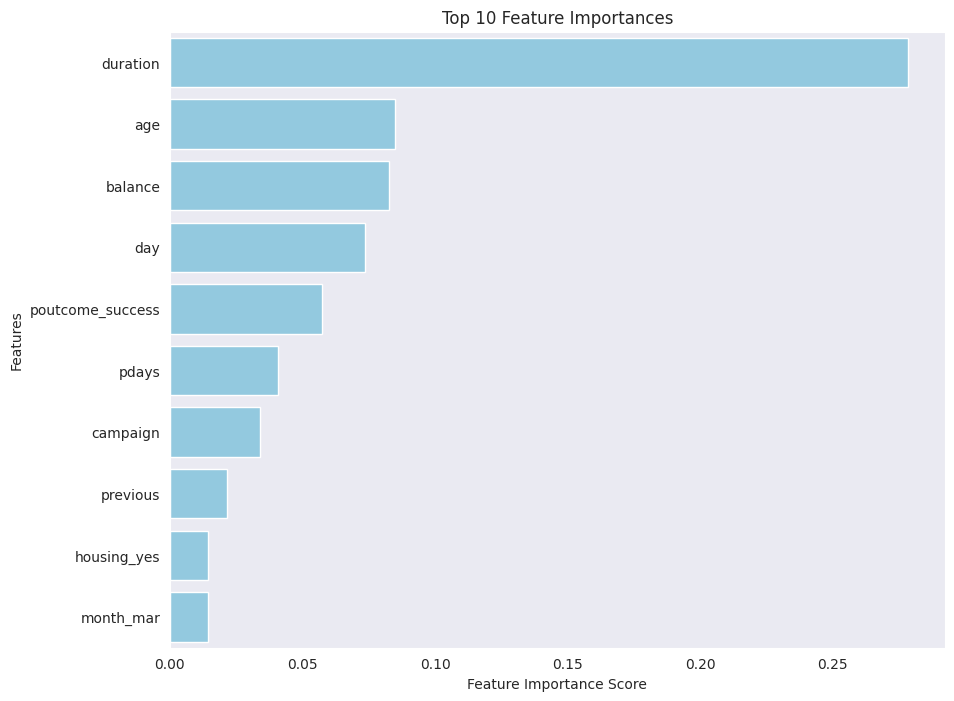

In [29]:
feature_importances = best_rf_model.feature_importances_

features_df = pd.DataFrame({
    "Feature": x_train.columns, 
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Display the top 10 features
top_10_features = features_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=top_10_features, color="skyblue")

plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")

plt.show()


From the graph:
- `Duration` appears to be the most significant feature in predicting whether a client will subscribe to a term deposit, which is intuitive as longer calls might indicate a higher level of client interest or engagement.
- `Age` and `Balance` are also important, suggesting that demographic factors and financial stability are relevant in the decision-making process.

## **Execute**

### 4.1 Data Summary

| Model | Accuracy | Precision | Recall | F1 Score | AUC-ROC |
|-------|----------|-----------|--------|----------|---------|
| log   | 0.8993   | 0.6257    | 0.3295 | 0.4317   | 0.9081  |
| gbm   | 0.9048   | 0.6417    | 0.4076 | 0.4985   | 0.9260  |
| rf    | 0.9060   | 0.6520    | 0.4086 | 0.5023   | 0.9274  |
| dc    | 0.8826   | 0.4947    | 0.5343 | 0.5137   | 0.7313  |
| svm   | 0.9037   | 0.6630    | 0.3467 | 0.4553   | -       |
| knn   | 0.8926   | 0.5678    | 0.3152 | 0.4054   | 0.8028  |
| xgb   | 0.9081   | 0.6287    | 0.5095 | 0.5629   | 0.9329  |
| lgbm  | 0.9099   | 0.6449    | 0.4981 | 0.5621   | 0.9361  |

After parameter turning for Random Forest:

| Metric     | Score           |
|------------|-----------------|
| Accuracy   | 0.9070          |
| AUC        | 0.9317          |
| Recall     | 0.4067          |
| F1 Score   | 0.5038          |
| Precision  | 0.6620          |

### 4.2 Recommendation

**Focus on call duration**

During marketing campaigns, allocate more resources to customers with longer call durations, as duration is the most influential characteristic for predicting subscriptions.

**Consider demographics**

Pay attention to age and balance as key demographics. Tailored marketing strategies can be developed for individuals of different age groups and levels of balance.